In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import codecs


ModuleNotFoundError: No module named 'mpld3'

In [5]:
train_data = "./traindata.text"

In [6]:
fpText  = codecs.open(train_data,'r',encoding='utf8')

In [7]:
content = fpText.read()

In [8]:
fpText.close()

In [12]:
type(content)

str

In [22]:
print (content[:1000])

LoL @ West Covina, California 
Things got a little festive at the office #christmas2016 @ RedRock… 
Step out and explore. # ️ @ Ellis Island Cafe 
@user @ Cathedral Preparatory School 
My baby bear @ Bubby's 
RuPaul's Drag Race bingo fun. Drag Queens be SEXY! #rupaulsdragrace @user abwyman #la… 
Black History like a Mufffffaaaaaka #blacchyna done thru her yugioh trap card like hell … 
Just light makeup ️ #blueeyes #lupusgirl #photography #modelingagency #modeling #smiling… 
@ BJ's Restaurant and Brewhouse 
So lovely catching up with my soul sister @user @ University of Victoria 
Perfect for this weather ️ #dessert #snowice #snowwhite #lasvegas #summer @ Snow White Cafe 
Had fun (at @user in New York, NY) 
Well Damn @ Oklahoma City, Oklahoma 
'scuse me while I kiss the sky. ___ : nikkileekv @ Malibu, California 
Fun in the sun ️ @ Brownstone Park, Portland, CT 
Celebrating #LAstyle @ Calle Tacos 
I think today is about to be a great day.. 
@user it's all Bama now What's your take on Kif

In [13]:
j=0

In [19]:
while j<100:
    print(content[:j])
    j+=1

In [31]:
df = pd.read_table('./traindata.text', delim_whitespace=False, names=('A'))

In [37]:
len(df['A'][5])

87

In [38]:
ds = pd.read_table('./traindata.label', delim_whitespace=False, names=('B'))

In [45]:
print ds['B'][5]

9


In [46]:
df['class']=ds['B'].astype('int')

In [47]:
df.head

<bound method NDFrame.head of                                                         A  class
0                          LoL @ West Covina, California       2
1       Things got a little festive at the office #chr...     17
2          Step out and explore. # ️ @ Ellis Island Cafe       0
3                   @user @ Cathedral Preparatory School      18
4                                 My baby bear @ Bubby's       1
5       RuPaul's Drag Race bingo fun. Drag Queens be S...      9
6       Black History like a Mufffffaaaaaka #blacchyna...      2
7       Just light makeup ️ #blueeyes #lupusgirl #phot...      0
8                        @ BJ's Restaurant and Brewhouse       8
9       So lovely catching up with my soul sister @use...     13
10      Perfect for this weather ️ #dessert #snowice #...      0
11                    Had fun (at @user in New York, NY)       1
12                   Well Damn @ Oklahoma City, Oklahoma       2
13      'scuse me while I kiss the sky. ___ : nikkilee...   

In [49]:
df['text length'] = df['A'].apply(len)

In [87]:
df.head

<bound method NDFrame.head of                                                         A  class  text length
0                          LoL @ West Covina, California       1           30
1       Things got a little festive at the office #chr...      1           68
2          Step out and explore. # ️ @ Ellis Island Cafe       1           46
3                   @user @ Cathedral Preparatory School       1           37
4                                 My baby bear @ Bubby's       1           23
5       RuPaul's Drag Race bingo fun. Drag Queens be S...      1           87
6       Black History like a Mufffffaaaaaka #blacchyna...      1           90
7       Just light makeup ️ #blueeyes #lupusgirl #phot...      1           90
8                        @ BJ's Restaurant and Brewhouse       1           32
9       So lovely catching up with my soul sister @use...      1           73
10      Perfect for this weather ️ #dessert #snowice #...      1           92
11                    Had fun (at 

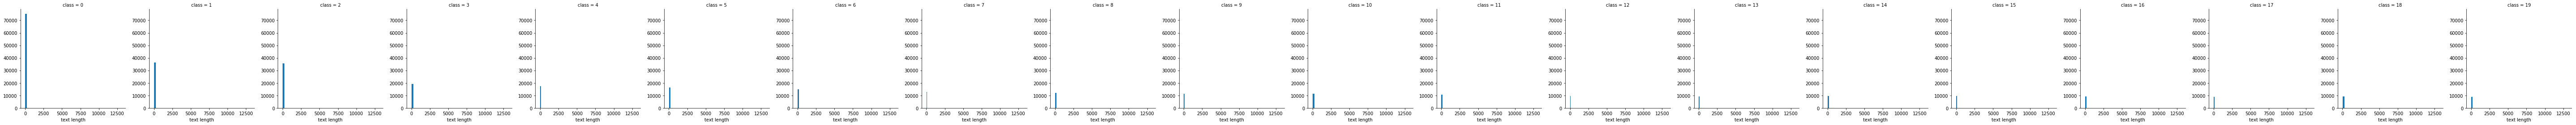

In [73]:
plt.figure(figsize=(8, 6))
g = sns.FacetGrid(data=df, col='class', size=4,aspect=1)


g.map(plt.hist, 'text length', bins=50)

plt.show()

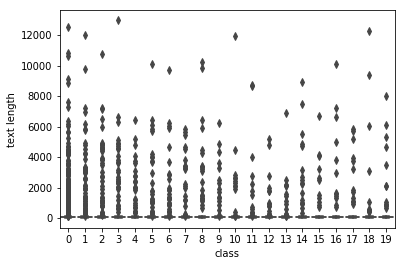

In [56]:
sns.boxplot(x='class', y='text length', data=df)
plt.show()

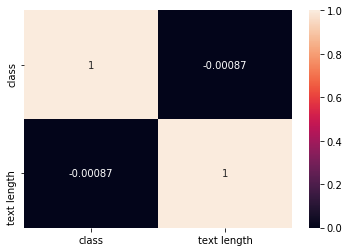

In [58]:
stars = df.groupby('class').mean()
stars.corr()
sns.heatmap(data=df.corr(), annot=True)
plt.show()